# Welcome to the Boltzmann solver

This repository provides a Boltzmann solver for studying the evolution of dark sector particles in the early universe. The solver is designed to compute the relic abundance of particles as a function of temperature, incorporating various processes such as 3-2 processes and annihilation to Standard Model particles.

The implementation is based on the methodology described in [arXiv:2311.17157](https://arxiv.org/pdf/2311.17157), which explores the dynamics of a strongly interacting dark sector with light vector mesons during freeze-out and its implications for cosmology. The solver allows for the inclusion of different interaction rates and model parameters.

**Some notes on the physics behind the solver:**

It has been designed to determined the relic abundance of dark pions $\pi_D$ originating from an $SU(N_{C_D})$ with $SU(N_{f_D})$ quark-like fermions, specifically intended for a model that considers light rho/vector mesons $\rho_D$. Therefore, the ratio of the masses $r_m=\tfrac{m_{\rho_D}}{m_{A}}$ is an important parameter, but the code can easily be adapted to other models. The dark pions have been renamed to particle A, and the dark rho mesons to particle B.


    
### Import statements

Run import statements and define paths. Remember to keep track of the units! The default g_star file takes T in units of GeV, so if you use this file you should always use GeV

Please note, if running gives an error, try to comment out the line "importlib.reload(solutionClass)", run it once and then put the line back in.

In [1]:
import sys, os, importlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define paths 
outputPath = './outputs/'
if not os.path.exists(outputPath):
    os.makedirs(outputPath)
        
g_starPath = './data/dsdofDHS.dat'
if not os.path.exists(g_starPath):
    print('Please provide %s or change "g_starPath" variable'%(g_starPath))
    sys.exit()
        

if g_starPath == './data/dsdofDHS.dat':
    g_starContent = pd.read_csv(g_starPath, header=None, skiprows=3, delimiter="\t")
    g_starContent = g_starContent.loc[::-1]
    g_starContent.name = 'squareroot'
else:
    g_starContent = pd.read_csv(g_starPath, header=None, delimiter="\t")
    g_starContent.name = None
    
# It is important that this statement comes after g_starContent is defined as the functionsFile needs this
from functionsFile import *
import functionsFile # will make the next line run successfully in event of new session
importlib.reload(functionsFile)

#Import solution class and update 
from solutionClass import BSolution
import solutionClass # will make the next line run successfully in event of new session
importlib.reload(solutionClass)

m_pl = 1.22E19 # [GeV]
print('Imported without issues')

Imported without issues


### Example of finding the relic abundance
To call an instance of the `BSolution` class, you need to specify the parameters such as the ratio `rm`, mass `mA`, and other optional arguments like `inclThermW`, `inclAnn`, or `exclB`. After creating the instance, you can use the `solve` method to compute the solution over a specified range of `x`. Finally, you can plot the results using `plotBoltzmannModels`.

Here we show an example including three models:
- `model_lightB`: A model where the B particle is light (`mB < 2*mA`) with `rm=1.9` and `mA=0.15 GeV`.
- `model_lightB_lowrm`: A similar model with a lower value of `rm=1.5`.
- `model_onlyA`: A model where where we assume the B particle is not relevant for the freeze-out (`mB > 2*mA`), i.e. excluding the 3A-A+B process and only consider the 3A-2A process. Please note that we still use the value of `rm` (<2) to define the decay constant fA. This affects the relic abundance.

In [2]:
# Define the parameters for the models
mA = 0.15 # [GeV]
rm = 1.9 # Ratio of mB/mA
Nf = 3 # Number of dark flavors 
    # Please note that 3A-2A is not allowed for Nf < 3, so if you want to use Nf=1 or 2 it does not make sense to use modelsA
Nc = 3 # Number of dark colors
x_init = 10
x_inf = 50

# This model is for the case where the rho meson is light, i.e. mB < 2*mA
model_lightB = BSolution(rm=rm, mA = mA, name='$m_B/m_A$=%.2f, $m_A$=%.2f GeV'%(rm,mA), Nf=Nf, Nc=Nc, 
                   inclThermW = True, inclAnn=False)
model_lightB.solve(x_init=x_init, x_inf=x_inf)

# This model is for the case where the rho meson is light, i.e. mB < 2*mA
# but with a lower value of rm
model_lightB_lowrm = BSolution(rm=1.5, mA = mA, name='$m_B/m_A$=%.2f, $m_A$=%.2f GeV'%(1.5,mA), Nf=Nf, Nc=Nc, 
                   inclThermW = True, inclAnn=False)
model_lightB_lowrm.solve(x_init=x_init, x_inf=x_inf)

  
# This model is for the case where the rho meson is heavy, i.e. mB > 2*mA
# This is somewhat of an effective model, as we still use rm<2, but exclude the 3A-A+B process
# The results are still valid, but note that the value of rm sets the value of fA, which affects the value of the relic abundance
model_onlyA = BSolution(rm=rm, mA = mA, name='$m_B/m_A$=%.2f, $m_A$=%.2f GeV'%(rm,mA), Nf=Nf,Nc=Nc, exclB = True)
model_onlyA.solve(x_init=x_init, x_inf=x_inf)



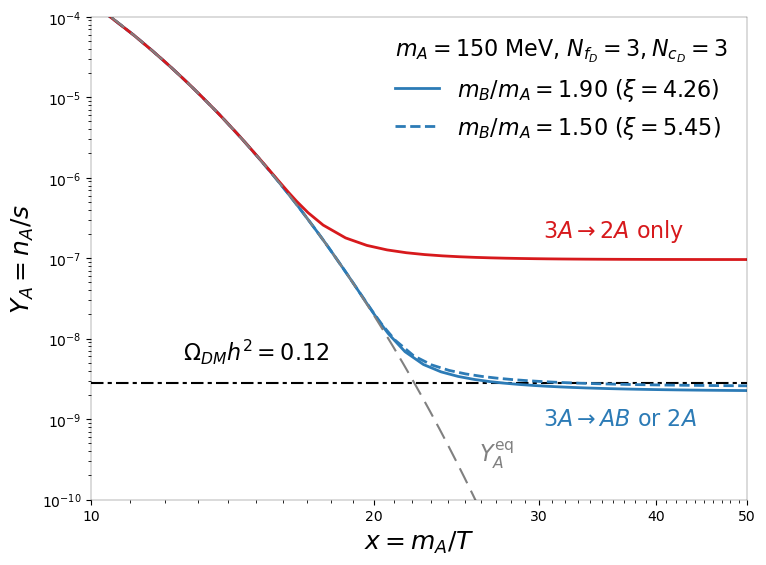

In [3]:
plotBoltzmannModels([model_lightB, model_lightB_lowrm],[model_onlyA], 10, 50, fileName='BoltzmannSolution')